# Tanzania Water Wells Project

Authors: Juliet Day, Nazar Mohl, Rishi Ahuja 

## Overview: 

Tanzania is a developing country which is struggling to provide clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether. Our project is to analyze available data and advise the Tanazanian Ministry of Water on which wells to target with available resources. We also recognize that beyond the human suffering and hardship, there are secondary effects on the population from lack of clean water and we will use this project to highlight one particular issue.

## Business Understanding: 

Stakeholder: Tanzanian Ministry of Water  
Business Problem: Tanzania's population is 57,000,000 and 40% of Tanzanians do not have access to clean water. 

Our goal is to inform the Tanzanian Ministry of Water on how to determine which wells are functioning and recommend how to allocate their resources to increase the number of functioning wells. We will examine how many wells are functioning and under what conditions they are not functioning or need repair. 

This is not an issue people in developed nations fully understand. There is the immediate physical suffering that comes from not having water, as well as major secondary effects, such as the hinderance for young women to receive a secondary education. This is because, not having local access to clean water, means that someone has to walk, sometimes miles, to get it. In most families, the men and boys are working, which means collecting water falls on the women, and often younger women who are in better physical shape, are the ones tasked with collecting water. We belive, if more wells were functioning, less time would need to be spent trying to find water, which would allow more girls to attend secondary school. 

## Data Understanding and Preparation: 

The analysis data was provided by our stakeholder, [Tanzania's Ministry of Water](https://www.maji.go.tz/). It was recorded by GeoData Consultants Ltd, compiled by Taarifa and is available for download at DrivenData. The dataset included information about 59,400 wells and after data cleaning, we used 38,691 data points.  

The dataset had 41 different columns, however we examined 4 technical features: source type, waterpoint type, construction year, and water quality. 

Our target column was status_group which indicated whether the well was "functional", "functional needs repair" or "non functional". We created a binary classification by combining "functional needs repair" with "non functional". 

Currently, only 56% of wells are fully functioning, leaving 44% that are not functioning at all or need of repair. 

In [1]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, accuracy_score, make_scorer, ConfusionMatrixDisplay, confusion_matrix

In [2]:
# import data

In [3]:
df_ind = pd.read_csv("Data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv", parse_dates=["date_recorded"])

In [4]:
df_dep = pd.read_csv("Data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv")

In [5]:
# Shows all columns in dataframe

pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
#look at each dataframe

In [7]:
df_ind.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.00,2011-03-14,Roman,1390,Roman,34.94,-9.86,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.00,2013-03-06,Grumeti,1399,GRUMETI,34.70,-2.15,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.00,2013-02-25,Lottery Club,686,World vision,37.46,-3.82,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.00,2013-01-28,Unicef,263,UNICEF,38.49,-11.16,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.00,2011-07-13,Action In A,0,Artisan,31.13,-1.83,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [8]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [9]:
df_dep.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [10]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [11]:
df_dep['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [12]:
#merge the two train dataframes- independents variable with dependent variable

In [13]:
df = pd.merge(df_ind,df_dep,on='id')
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.00,2011-03-14,Roman,1390,Roman,34.94,-9.86,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.00,2013-03-06,Grumeti,1399,GRUMETI,34.70,-2.15,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.00,2013-02-25,Lottery Club,686,World vision,37.46,-3.82,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.00,2013-01-28,Unicef,263,UNICEF,38.49,-11.16,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.00,2011-07-13,Action In A,0,Artisan,31.13,-1.83,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.00,2013-05-03,Germany Republi,1210,CES,37.17,-3.25,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.00,2011-05-07,Cefa-njombe,1212,Cefa,35.25,-9.07,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.00,2011-04-11,NaN,0,NaN,34.02,-8.75,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.00,2011-03-08,Malec,0,Musa,35.86,-6.38,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [15]:
#check for null values
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Here we created a new dataframe with only the following columns so as to concentrate on the technical features. We excluded the geographic and political data for a later analysis.  

In [16]:
df_new = df[["source_type", "water_quality", "waterpoint_type", "status_group", "construction_year"]].copy()

In [17]:
#recheck for null values
df_new.isna().sum()

source_type          0
water_quality        0
waterpoint_type      0
status_group         0
construction_year    0
dtype: int64

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   source_type        59400 non-null  object
 1   water_quality      59400 non-null  object
 2   waterpoint_type    59400 non-null  object
 3   status_group       59400 non-null  object
 4   construction_year  59400 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


In [19]:
df_new['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

Here we binned the target "status_group" to transform it from ternary to binary and created a new column for these values called "sg_new".

In [20]:
sg_new = []
for sg in df_new['status_group']:
    if sg == 'functional':
        sg_new.append(1)
    else:
        sg_new.append(0)
df_new["sg_new"] = sg_new

Now that we binned "status_group" into a new column "sg_new", we dropped the "status_group" column.

In [21]:
df_new.drop(['status_group'], axis =1, inplace = True)

In [22]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

Created exploratory barcharts to examine each feature we planned to use in our model. 

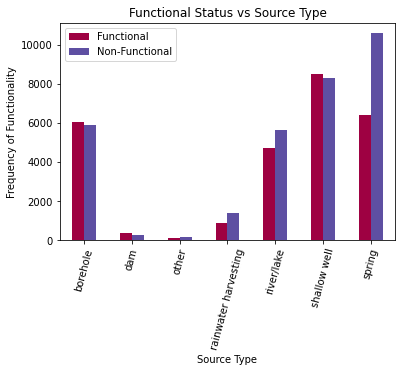

In [23]:
#Status vs source type
%matplotlib inline
pd.crosstab(df_new.source_type,df_new.sg_new).plot(kind='bar', colormap = "Spectral")
plt.title('Functional Status vs Source Type')
plt.xlabel('Source Type')
plt.ylabel('Frequency of Functionality')
plt.legend(["Functional", "Non-Functional"])
plt.xticks(rotation = 75)
plt.savefig('Images/source_type',bbox_inches='tight');

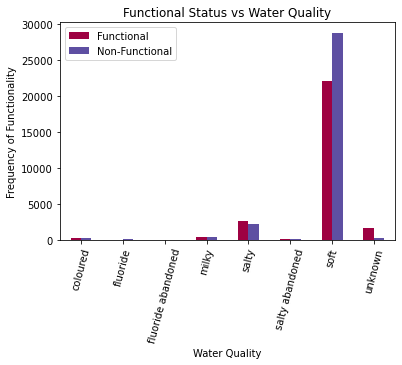

In [24]:
#Status vs water quality
%matplotlib inline
pd.crosstab(df_new.water_quality,df_new.sg_new).plot(kind='bar', colormap = "Spectral")
plt.title('Functional Status vs Water Quality')
plt.xlabel('Water Quality')
plt.ylabel('Frequency of Functionality')
plt.xticks(rotation = 75)
plt.legend(["Functional", "Non-Functional"])
plt.savefig('Images/water_quality', bbox_inches='tight');

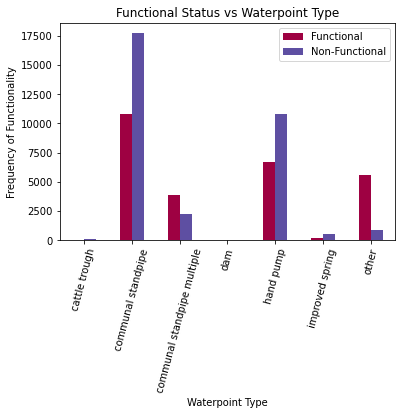

In [25]:
#Status vs waterpoint_type
%matplotlib inline
pd.crosstab(df_new.waterpoint_type,df_new.sg_new).plot(kind='bar', colormap = "Spectral")
plt.title('Functional Status vs Waterpoint Type')
plt.xlabel('Waterpoint Type')
plt.ylabel('Frequency of Functionality')
plt.xticks(rotation = 75)
plt.legend(["Functional", "Non-Functional"])
plt.savefig('Images/waterpoint_type',bbox_inches='tight');

In [26]:
#dropped rows with a value of 0 listed for construction_year as these are essentially null values
df_new.drop(df_new[df_new['construction_year'] == 0].index, inplace = True)

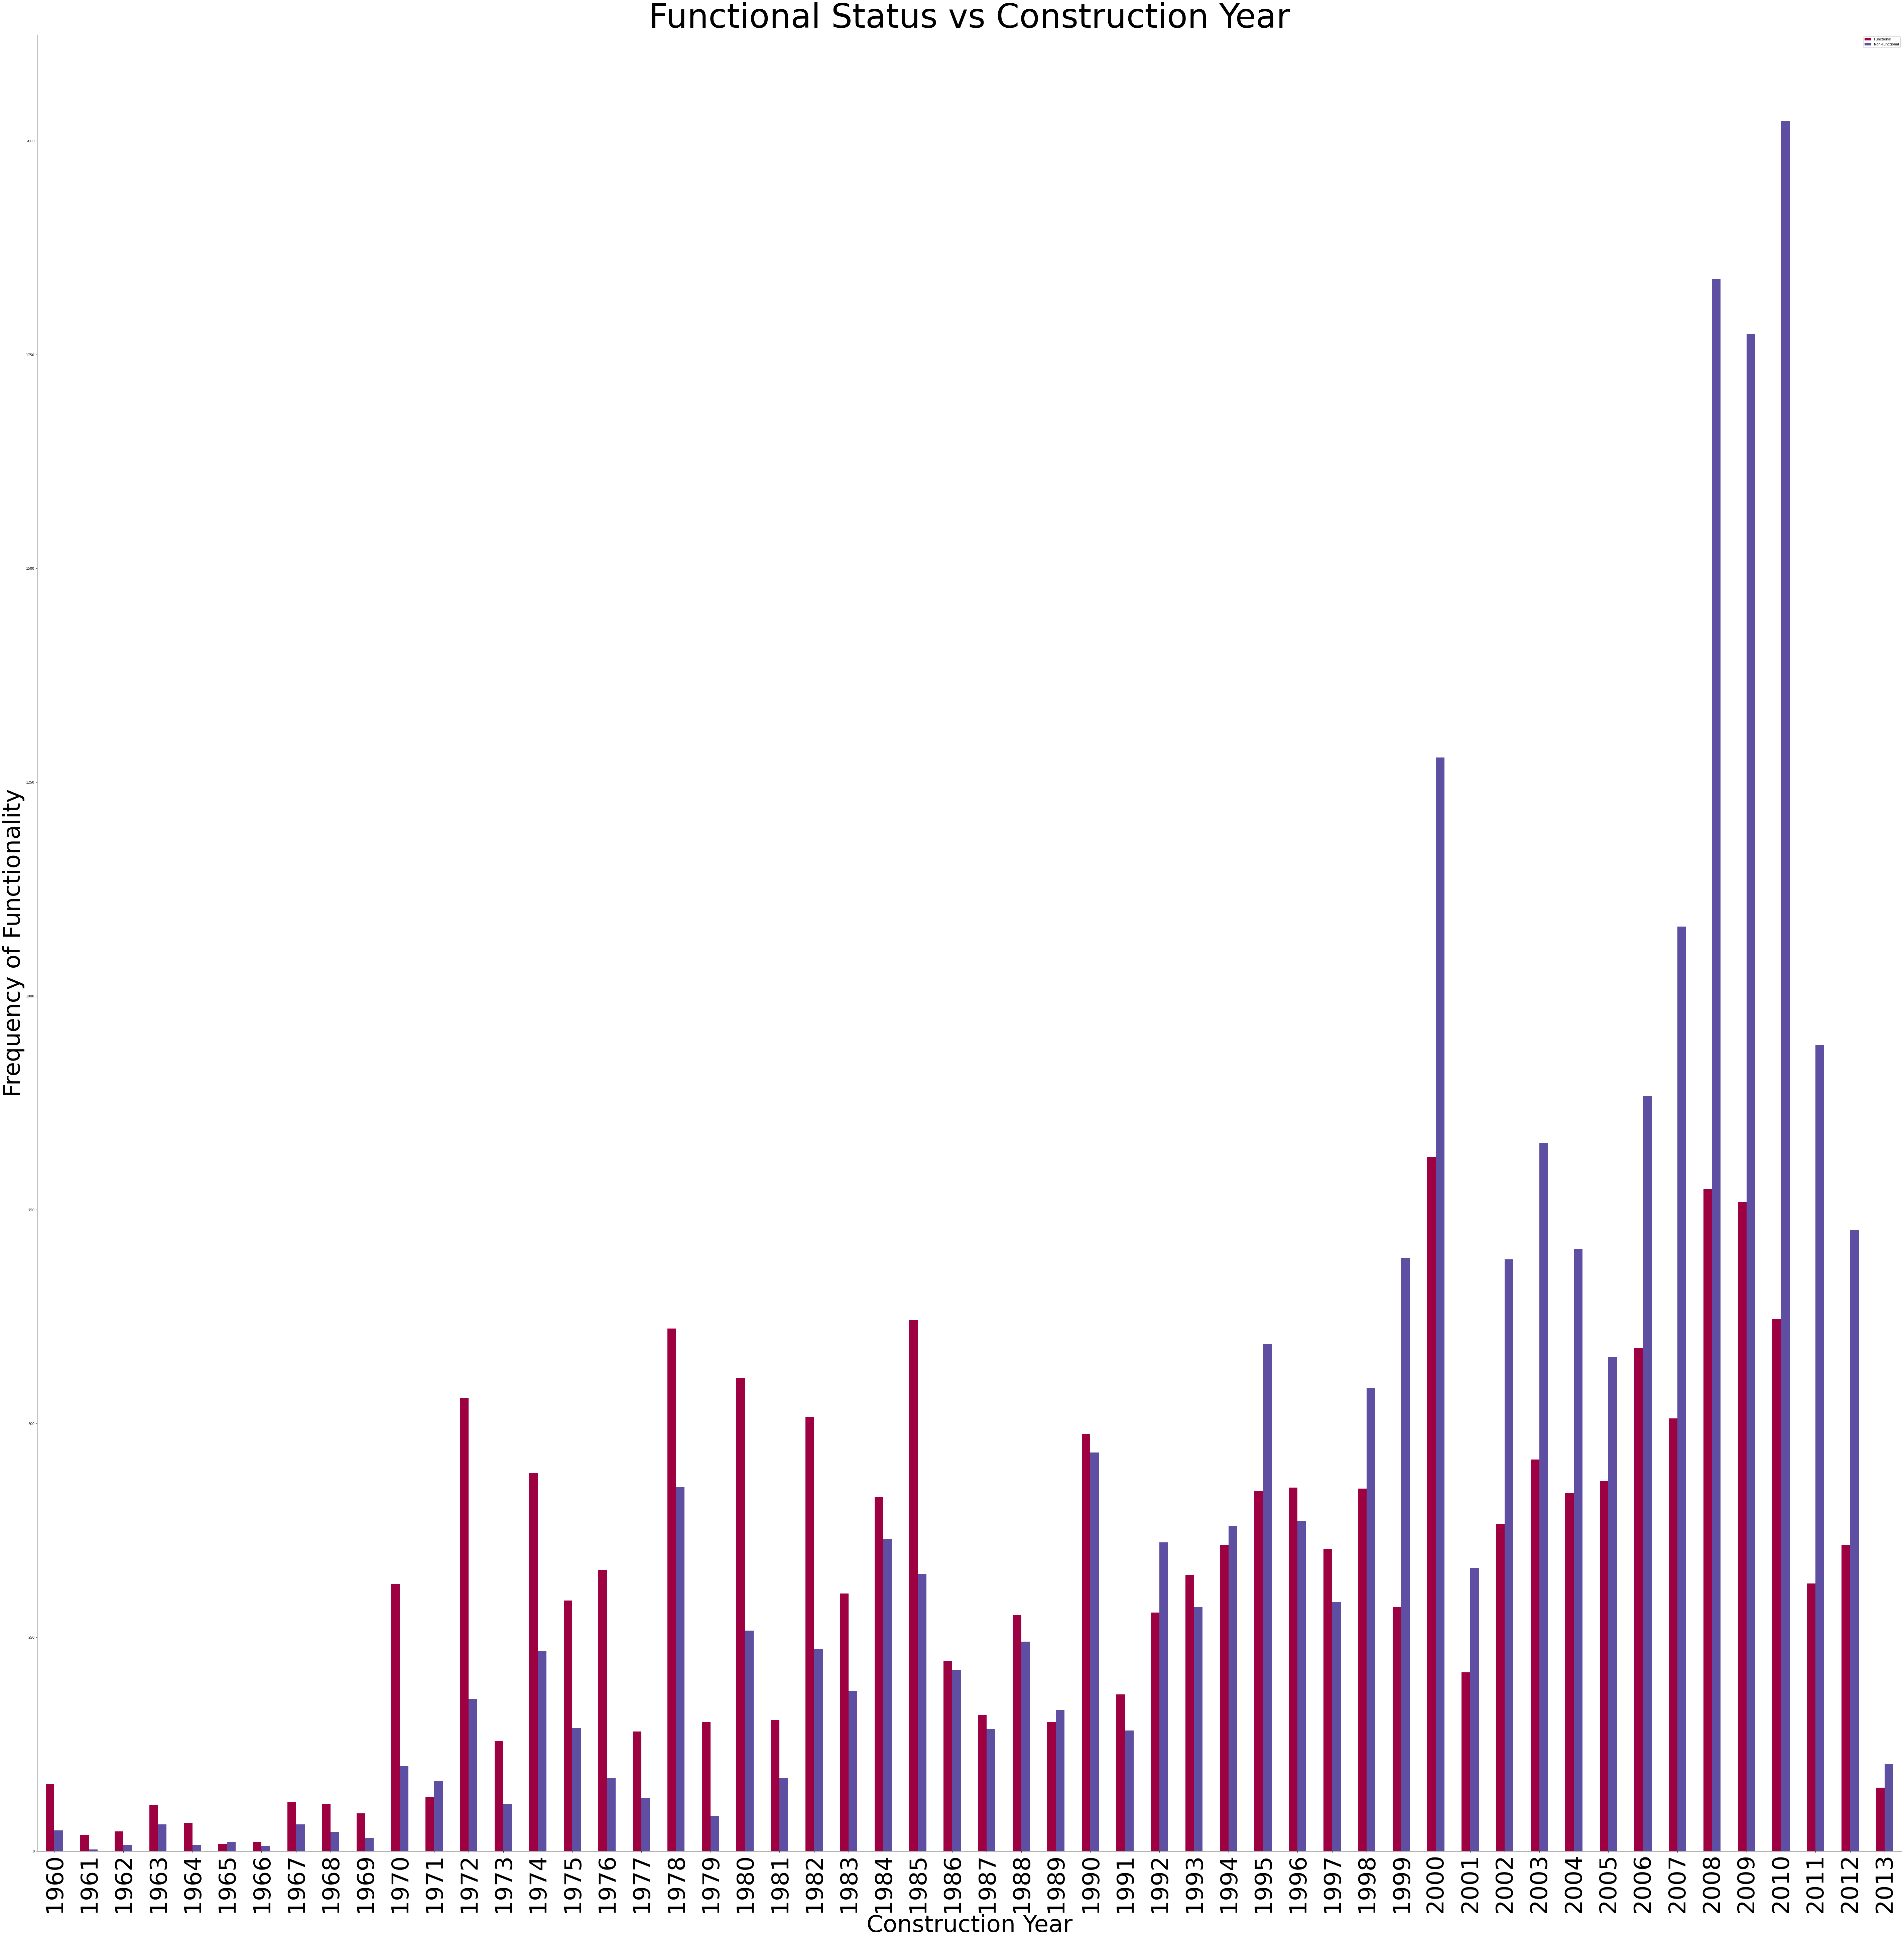

In [27]:
#Status vs construction year
%matplotlib inline
pd.crosstab(df_new.construction_year,df_new.sg_new).plot(kind='bar', figsize= (100,100), colormap = "Spectral")
plt.title('Functional Status vs Construction Year', fontsize = 100)
plt.xlabel('Construction Year', fontsize = 70)
plt.xticks(rotation = 25, fontsize = 70)
plt.ylabel('Frequency of Functionality', fontsize = 70)
plt.xticks(rotation = 90, fontsize = 70);
plt.legend(["Functional", "Non-Functional"])

In [28]:
#examine data
df_new

,source_type,water_quality,waterpoint_type,construction_year,sg_new
0,spring,soft,communal standpipe,1999,1
1,rainwater harvesting,soft,communal standpipe,2010,1
2,dam,soft,communal standpipe multiple,2009,1
3,borehole,soft,communal standpipe multiple,1986,0
5,other,salty,communal standpipe multiple,2009,1
...,...,...,...,...,...
59391,river/lake,soft,communal standpipe,1967,0
59394,borehole,soft,communal standpipe,2007,0
59395,spring,soft,communal standpipe,1999,1
59396,river/lake,soft,communal standpipe,1996,1


In [29]:
#created a new feature/column "construction_decades" where we binned the "construction_year" by decade

def decades(year):
    #Returns unknown if value not recorded
    if year == 0:
        return 'Unknown'
    else:
        return str((year // 10) * 10)
#Apply mapping to column
df_new['construction_decades'] = df_new['construction_year'].apply(decades)

In [30]:
#dropped "construction_year", now that we have the new feature "construction_decades"
df_new.drop(['construction_year'], axis =1, inplace = True)

In [31]:
#examine data
df_new.head()

,source_type,water_quality,waterpoint_type,sg_new,construction_decades
0,spring,soft,communal standpipe,1,1990
1,rainwater harvesting,soft,communal standpipe,1,2010
2,dam,soft,communal standpipe multiple,1,2000
3,borehole,soft,communal standpipe multiple,0,1980
5,other,salty,communal standpipe multiple,1,2000


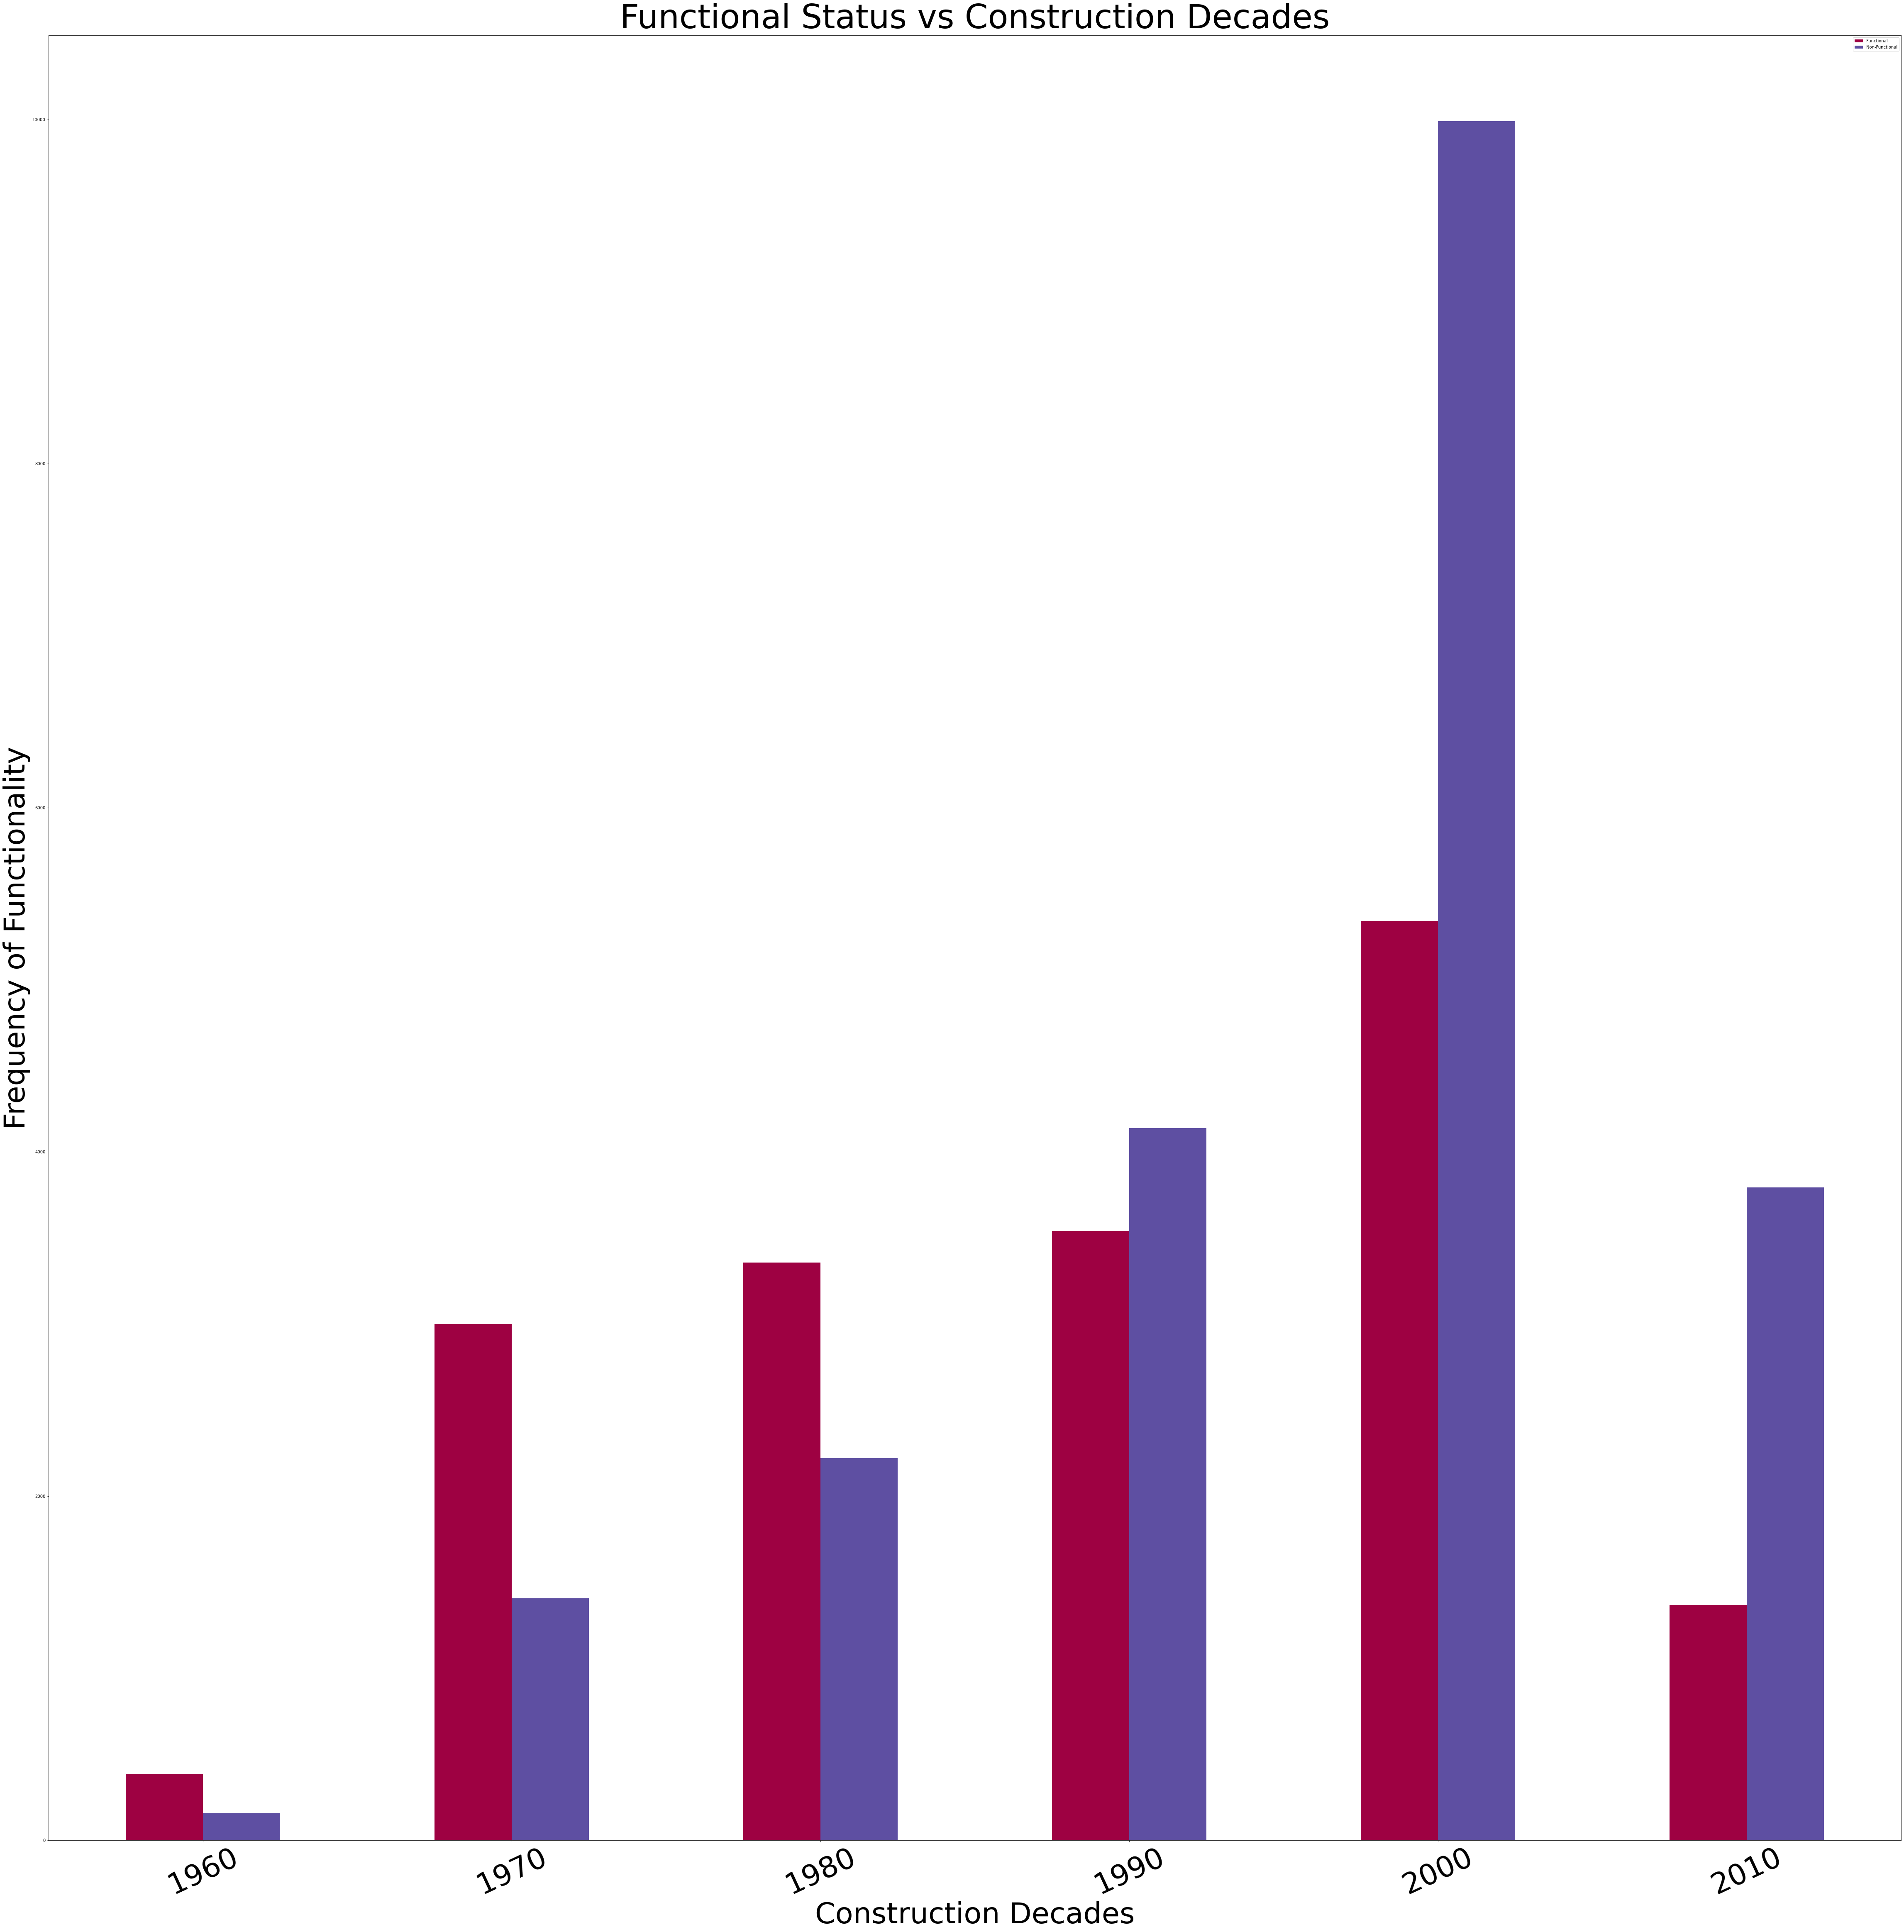

In [32]:
#Status vs construction year
%matplotlib inline
pd.crosstab(df_new.construction_decades,df_new.sg_new).plot(kind='bar', figsize= (80,80), colormap = "Spectral", rot = 60)
plt.title('Functional Status vs Construction Decades', fontsize = 80)
plt.xlabel('Construction Decades', fontsize = 70)
plt.ylabel('Frequency of Functionality', fontsize = 70)
plt.xticks(rotation = 25, fontsize = 70)
plt.legend(["Functional", "Non-Functional"])
plt.savefig('Images/construction_decades',bbox_inches='tight');

## Modeling

In [33]:
#partion features and target 
X = df_new.drop('sg_new', axis=1)
y = df_new['sg_new']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Because the features were categorical we created dummy variables (similar to One Hot Encoding) to transform the data to numeric values.

In [34]:
#create dummy variables

In [35]:
X_train_new = pd.get_dummies(X_train)

In [36]:
X_test_new = pd.get_dummies(X_test)

In [37]:
#look at the data
X_test_new

,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,construction_decades_1960,construction_decades_1970,construction_decades_1980,construction_decades_1990,construction_decades_2000,construction_decades_2010
27546,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
18163,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
42326,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
57387,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2565,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1164,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
14955,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
58610,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [38]:
#look at the breakdown of values for "sg_new" 
df_new['sg_new'].value_counts(normalize = True)

1   0.56
0   0.44
Name: sg_new, dtype: float64

### Dummy Model:

We first created a Dummy Model which will always choose the majority class.

In [39]:
# Instantiate and fit the model on our data
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train_new, y_train)

DummyClassifier(strategy='most_frequent')

In [40]:
y_dummy_pred = dummy_model.predict(X_test_new)

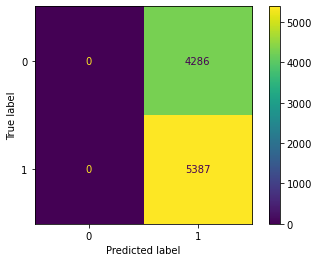

In [41]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_dummy_pred)
cmdis = ConfusionMatrixDisplay(cm)
cmdis.plot();

In [42]:
print(classification_report(y_test, y_dummy_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4286
           1       0.56      1.00      0.72      5387

    accuracy                           0.56      9673
   macro avg       0.28      0.50      0.36      9673
weighted avg       0.31      0.56      0.40      9673



C:\Users\NM\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Our dummy model has an accuracy of 56%, precision of 56%, recall of 100% and f1-score of 72%.  
This 56% accuracy score confirms our normalized "sg_new" value count breakdown above. 

### First Logistic Regression Model:

In [43]:
# build classifier
logreg_1 = LogisticRegression(random_state=42)
logreg_1.fit(X_train_new, y_train)

C:\Users\NM\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [44]:
y_pred = logreg_1.predict(X_test_new)

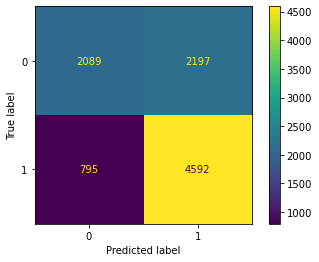

In [45]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmdis = ConfusionMatrixDisplay(cm)
cmdis.plot();

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.49      0.58      4286
           1       0.68      0.85      0.75      5387

    accuracy                           0.69      9673
   macro avg       0.70      0.67      0.67      9673
weighted avg       0.70      0.69      0.68      9673



Our confusion matrix gives us scores for precision, recall, f1-score and accuracy.  
We used precision and recall as our evaluation metrics. 

Recall (False Negatives) tells us which wells our model predicted weren't working but in reality were. This would result in lost resources and time for the Tanzanian Government. 

Precision (False Positives) tells us which wells our model predicted were working but in reality were not. This would result in the Tanzanian people potentially not having access to water and the government not knowing.

### Second Logistic Regression Model: 

Next, we created a second logistic regression model where we balanced our class weight.

In [47]:
# build classifier
logreg_2 = LogisticRegression(class_weight = 'balanced', random_state=42)
logreg_2.fit(X_train_new, y_train)

C:\Users\NM\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [48]:
y_pred_2 = logreg_2.predict(X_test_new)

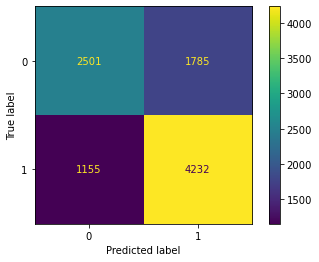

In [49]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred_2)
cmdis = ConfusionMatrixDisplay(cm)
cmdis.plot();

In [50]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.68      0.58      0.63      4286
           1       0.70      0.79      0.74      5387

    accuracy                           0.70      9673
   macro avg       0.69      0.68      0.69      9673
weighted avg       0.69      0.70      0.69      9673



### Third Logistic Regression Model: 

Our next model was created with a new solver of "Newton-cg" and a C value of 0.5. 

In [51]:
# build classifier
logreg_3 = LogisticRegression(solver = "newton-cg", C = 0.5, random_state=42)
logreg_3.fit(X_train_new, y_train)

LogisticRegression(C=0.5, random_state=42, solver='newton-cg')

In [52]:
y_pred_3 = logreg_3.predict(X_test_new)

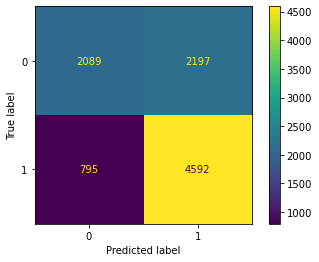

In [53]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred_3)
cmdis = ConfusionMatrixDisplay(cm)
cmdis.plot();

In [54]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.72      0.49      0.58      4286
           1       0.68      0.85      0.75      5387

    accuracy                           0.69      9673
   macro avg       0.70      0.67      0.67      9673
weighted avg       0.70      0.69      0.68      9673



In [55]:
#Printed all three classification reports sequentially to easily compare findings.
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_2))
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.72      0.49      0.58      4286
           1       0.68      0.85      0.75      5387

    accuracy                           0.69      9673
   macro avg       0.70      0.67      0.67      9673
weighted avg       0.70      0.69      0.68      9673

              precision    recall  f1-score   support

           0       0.68      0.58      0.63      4286
           1       0.70      0.79      0.74      5387

    accuracy                           0.70      9673
   macro avg       0.69      0.68      0.69      9673
weighted avg       0.69      0.70      0.69      9673

              precision    recall  f1-score   support

           0       0.72      0.49      0.58      4286
           1       0.68      0.85      0.75      5387

    accuracy                           0.69      9673
   macro avg       0.70      0.67      0.67      9673
weighted avg       0.70      0.69      0.68      9673



## Conclusion/ Recommendations

We chose model 2 as our final model because it has the best balance of precison and recall.  

In [56]:
#found the coefficient of each feature for our chosen model, #2. 
logreg_2.coef_

array([[-0.39226278,  0.02403535,  0.90264954, -0.37522539, -0.12060495,
        -0.40755111,  0.19508107,  0.58703076,  0.95273991, -0.83571067,
         0.29200915,  0.16443848, -0.11320626,  0.4587168 , -1.67989644,
         0.73964453,  0.27375074, -0.79908258,  0.86691112,  0.26661181,
         0.66156413, -2.18327801, -0.84890639, -0.74821708, -0.31816106,
         0.10722974,  0.50216822,  1.1320083 ]])

These coefficients tell us how much more or less likely a well is to fail if they have this feature. 

In [57]:
#cross referenced the coefficient values with the dataframe
X_train_new

,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,construction_decades_1960,construction_decades_1970,construction_decades_1980,construction_decades_1990,construction_decades_2000,construction_decades_2010
38274,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
20069,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
33983,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
24515,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
28178,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
17323,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
58589,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1330,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


The predictor with the highest coefficient will be the one that is most likely to function. 
The predictor with the lowest coefficient will be the one that is least likely to function. 
We are identifying the highest and lowest coefficient for each of the 4 predictors we included in this analysis: source type, water_quality, waterpoint type and construction decade. 

In [58]:
#highest source_type coefficient: source_type_spring

In [59]:
np.exp(.19)

1.2092495976572515

Other than "source_type_other", the highest coefficient for source type is "source_type_spring".

In [60]:
#lowest source_type coefficient: source_type_shallow_well

In [61]:
np.exp(-.4)

0.6703200460356393

In [62]:
#highest water_quality coefficient: water_quality_fluoride

In [63]:
np.exp(.95)

2.585709659315846

The highest coefficient for water_quality is "water_quality_flouride".

In [64]:
#lowest water_quality coefficient: water_quality_salty

In [65]:
np.exp(.164)

1.1782143150927222

Based on our data, water_quality_salty had the lowest coefficient with a sufficient amount of data points.

In [66]:
#highest waterpoint_type coefficient: waterpoint_type_improved_spring

In [67]:
np.exp(.66)

1.9347923344020317

The highest coefficient for waterpoint_type is "dam" with a coefficient of 0.86, however there are only 7 data points with the waterpoint dam, so we used the second highest waterpoint type which was "waterpoint_type_improved_spring". 

In [68]:
#lowest waterpoint_type coefficient: waterpoint_type_communal standpipe multiple

In [69]:
np.exp(-0.799)

0.44977851782072775

After waterpoint_type_other, the lowest coefficient was waterpoint_type_communal standpipe multiple.

In [70]:
#highest construction_decades coefficient: construction_decades_2010

In [71]:
np.exp(1.13)

3.095656500124711

The highest coefficient for construction_decades was construction_decades_2010, which confirms the obvious fact that the newest wells will be most likely to function correctly.

In [72]:
#lowest construction_decades coefficient: 

In [73]:
np.exp(-0.848)

0.4282706172126597

This again confirms the obvious fact that the oldest wells will be the least likely to function correctly.

## Conclusion:

Based on the coefficients, our main findings were:  
In terms of water quality, our model predicted that water having Floride made the well 2.58x less likely to fail.   
In terms of waterpoint type, our model predicted that an improved spring water point made the well 1.93x less likely to fail.  

With this model, the Tanzanian Ministry of Water can identify wells in need of repair or replacement and better allocate their resources without wasting time going to fix wells that are already functioning. 